# k-Nearest Neighbor (kNN) exercise
-   Binary digit learning using  VGG16 in order to
    get features from mnist images of 0/1
-   Use nearest neighbor to classify

**Run some setup code for this notebook.**

In [5]:
# Required imports
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from KNNeighbors import KNearestNeighbor
from data_utils import load_MNIST, normalize_dataset
import matplotlib.pyplot as plt
from feature_extractor import FeatureExtractor
from sklearn.metrics import accuracy_score

**Required constants**

In [6]:
IMG_ROWS, IMG_COLS = 28, 28
BATCH_SIZE = 128
NUM_CLASS = 2
EPOCHS = 5
CHANNELS=1
FEATURES_LAYERS=13

**Load mnist dataset**

In [7]:
(x_train, y_train), (x_test, y_test) =load_MNIST()


**Display example data**

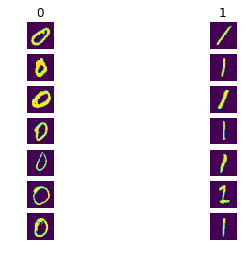

In [8]:
classes = ['0', '1']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**Prepare the dataset**

In [9]:
# x
x_train=normalize_dataset(x_train,IMG_ROWS, IMG_COLS,CHANNELS)
x_test=normalize_dataset(x_test,IMG_ROWS, IMG_COLS,CHANNELS)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (12665, 28, 28, 1)
Training labels shape:  (12665,)
Test data shape:  (2115, 28, 28, 1)
Test labels shape:  (2115,)


**Extract Features**

In [10]:
# create feature extractor
feature_extractor=FeatureExtractor(x_train,y_train,
                                   BATCH_SIZE,EPOCHS,
                                   x_test,y_test)
# fit to data
feature_extractor.fit()

# extract features
train_features=feature_extractor.extract_features(x_train)
test_features=feature_extractor.extract_features(x_test)

# reshape
train_features=train_features.reshape(train_features.shape[0],2*2*512)
test_features=test_features.reshape(test_features.shape[0],2*2*512)

print("train_features:",train_features.shape)
print("test_features:",test_features.shape)

train_features: (12665, 2048)
test_features: (2115, 2048)


**Classify on different k values**

In [11]:
for k in [1, 3, 5, 7,10, 20, 50, 100]:
    classifier = KNearestNeighbor()
    classifier.train(train_features, y_train)
    y_test_pred = classifier.predict(test_features, k=k)

    # Compute and display the accuracy
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = 100*(float(num_correct) / test_features.shape[0])

    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, test_features.shape[0], accuracy))

k=1 Got 2113 / 2115 correct => accuracy: 99.905437
k=3 Got 2114 / 2115 correct => accuracy: 99.952719
k=5 Got 2114 / 2115 correct => accuracy: 99.952719
k=7 Got 2114 / 2115 correct => accuracy: 99.952719
k=10 Got 2114 / 2115 correct => accuracy: 99.952719
k=20 Got 2114 / 2115 correct => accuracy: 99.952719
k=50 Got 2114 / 2115 correct => accuracy: 99.952719
k=100 Got 2114 / 2115 correct => accuracy: 99.952719
